In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def initial(delta_x=0.05):
    L = 4.0
    N = L/delta_x + 1
    x = np.linspace(0.0, L, int(N))
    u = np.zeros(int(N))
    ii = x<2.0
    u[ii] = 1.0
    return x, u

In [11]:
def flux(u):
    return 0.5 * u**2

In [12]:
def Lax(u, t_max=0.45, delta_t = 0.015, delta_x=5.0):
    N_t = int(t_max/delta_t)
    u_final = u.copy()
    for i in range(N_t):
        F = flux(u)
        u_final[1:-1] = 0.5*(u[2:] + u[0:-2]) 
        u_final[1:-1] -= (0.5*delta_t/delta_x)*(F[2:] - F[0:-2]) 
        u = u_final.copy()
    return u_final

In [13]:
x, u_init = initial()
t_max_values = [0.0, 0.5, 1.0, 2.0]

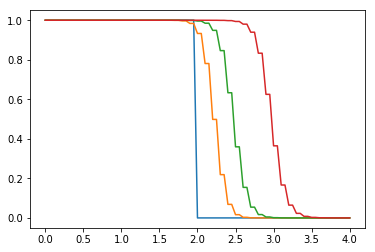

In [14]:
for t_max in t_max_values:
    delta_x = 0.05
    x, u_init = initial(delta_x=delta_x)
    u_final = Lax(u_init, t_max=t_max,delta_t=0.5*delta_x, delta_x=delta_x)
    plt.plot(x, u_final)
plt.show()